# Tema 10: Procesamiento del Lenguaje Natural (II) - corpus
Natural Language Toolkit (NLTK) es una de las librerías de Python más famosas para el procesamiento del lenguaje natural (PLN). En realidad, es un conjunto de librerías diseñadas para trabajar con datos procedentes del lenguaje humano: algunas son recursos léxicos, como distintos corpus o WordNet, y otras incluyen funciones que hacen más fácil las tareas típicas del PLN como son la clasificación de textos, la tokenización, el stemming, el postagging, el parsing...

Su éxito reside en que han sabido adaptar su manejo a gente de todo tipo de perfiles, como lingüistas, ingenieros, estudiantes, profesores, investigadores... Y lo mejor de todo es que es gratis, de código libre y respaldado por una gran comunidad.

En este cuaderno adapto el [capítulo 1 del libro de NLTK](https://www.nltk.org/book/ch01.html), ya que en este se combinan las posibilidades de la librería con una introducción a Python y la programación en general, que ya tenéis superada. Aun así, sentíos libres de leerlo y curiosearlo para ampliar conocimientos, ya que también se explican muchos conceptos del PLN.

## Descarga e instalación
### Descargar la librería
Si has instalado Python con Anaconda, puedes ir directamente al paso de descargar los datos. Si no, debes instalar NLTK 3.0, que puedes [descargar gratuitamente](http://nltk.org). Puedes seguir las instrucciones para bajar la versión que requiera tu sistema operativo, o seguir este resumen:

1) Escribe lo siguiente en la terminal para instalar NLTK:

In [1]:
pip install nltk


The following command must be run outside of the IPython shell:

    $ pip install nltk

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


2) Para comprobar que se ha instalado bien, importa la librería en Python:

In [2]:
import nltk

Si es así, tras unos segundos aparecerá de nuevo el prompt (`>>>`) y podrás seguir. Si algo ha fallado, coméntalo en el foro del curso.

### Descargar los datos
NLTK no es solo software, sino un montón de recursos léxicos; probablemente no nos interesarán todos, de momento para aprender solo necesitamos `book`, que es el que está pensado para poder ejecutar todo lo que se enseña en el libro.

1) Para ello, escribe en la terminal:

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

2) Aparecerá una interfaz gráfica muy fea como la de la imagen. Elige `book` y dale a `Download`.
<img src="pic-1002-1.png" alt="Cuadro de diálogo de descarga de paquetes de NLTK" style="width: 500px;"/>
## Explorando corpus
Ahora, si todo ha ido bien, deberías poder ejecutar la siguiente celda y ver cómo van imprimiéndose los títulos de los distintos textos que contiene este módulo.

In [4]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Lo que hemos importado son diferentes objetos Text, que como ves son diversos textos en inglés. Si ejecutamos, por ejemplo, `text1` nos devuelve su título, autor y año, como buen objeto Text:

In [5]:
text1

<Text: Moby Dick by Herman Melville 1851>

Estos objetos Text tienen la particularidad de que podemos ejecutar sobre ellos ciertas operaciones muy interesantes para explorar su vocabulario y compararlo con el de otros textos. Estas operaciones suelen trabajar con los contextos de las palabras y por eso se utilizan en estudios de [semántica distribucional](https://es.wikipedia.org/wiki/Sem%C3%A1ntica_distribucional).

Por ejemplo, tenemos el método `.concordance()` que recibe una string sin espacios (típicamente una palabra) como parámetro y devuelve todas las apariciones de esa palabra en el texto, con su contexto por delante y por detrás:

In [6]:
text1.concordance("man")

Displaying 25 of 25 matches:
 Civitas ) which is but an artificial man ." -- OPENING SENTENCE OF HOBBES ' S 
y of that sort that was killed by any man , such is his fierceness and swiftnes
in his deepest reveries -- stand that man on his legs , set his feet a - going 
it ? The urbane activity with which a man receives money is really marvellous ,
, and that on no account can a monied man enter heaven . Ah ! how cheerfully we
ure truly , enough to drive a nervous man distracted . Yet was there a sort of 
ss needle sojourning in the body of a man , travelled full forty feet , and at 
 him ), bustles a little withered old man , who , for their money , dearly sell
ld put up with the half of any decent man ' s blanket . " I thought so . All ri
king as much noise as the rest . This man interested me at once ; and since the
 . I have seldom seen such brawn in a man . His face was deeply brown and burnt
ions had mounted to its height , this man slipped away unobserved , and I saw n
us to the e

Vemos que aparece muchas veces en los mismos contextos, los esperables para un sustantivo: por delante determinantes y adjetivos, por detrás verbos, preposiciones...

Y podríamos preguntarnos: ¿qué otras palabras aparecen en contextos similares? Pues para eso tenemos el método `.similar()`:

In [7]:
text1.similar("man")

whale ship one it thing boat time all that ahab him sea captain whales
way matter moment and world as


Este método nos devuelve palabras que comparten muchos contextos con la palabra que le pasemos como parámetro, en comparación con el resto de palabras de ese texto.

Como era de esperar, obtenemos otras palabras semánticamente parecidas, pues también son nombres o pronombres, muchos son de persona, son agentivos, etc.

Por supuesto, en otros textos obtendremos resultados diferentes para la misma palabra:

In [8]:
text2.similar("man")

woman person lady year house living moment week letter way time friend
family gentleman thing world men other piece day


Así que no solo obtenemos información sobre una palabra, sino también sobre el texto.

Y cuando sospechemos que podemos encontrar contextos comunes a diferentes palabras, podemos consultarlos con `.common_contexts()`, pasándole una lista con dos o más palabras como argumento:

In [9]:
text1.common_contexts(["man", "woman"])

a_s old_s old_he old_of


In [10]:
text2.common_contexts(["man", "woman"])

young_who a_who a_whose a_whom a_of a_to young_of young_to other_in
a_in young_i a_as


Curiosísimo cómo en _Moby Dick_ el adjetivo que más veces aparece delante de "man" y "woman" sea "old", y en _Sentido y sensibilidad_ es precisamente su antónimo, "young".

In [11]:
text2.common_contexts(["he", "she", "it"])

but_was than_was for_was as_could was_to what_was had_been if_had
if_did if_could than_had that_was if_is but_has you_is if_were
that_might which_had but_is as_was


Otra cosa interesante que podemos ver es dónde aparecen las palabras que nos interesen en los textos, es decir, a qué altura del texto se mencionan. Podemos generar lo que se llama una _gráfica de dispersión_ (_dispersion plot_ en inglés) para visualizarlo rápidamente. En ella, cada raya representa una palabra, y cada fila, el texto completo.

Ejecuta lo siguiente en la terminal (en los cuadernos de Jupyter podrás ver la gráfica, pero no será dinámica: la de la terminal saldrá en una ventana nueva y podrás hacer zoom, moverte, cambiarle los colores, los márgenes, etc.), sin olvidar importar antes `nltk` y el módulo `book` como hemos hecho antes:

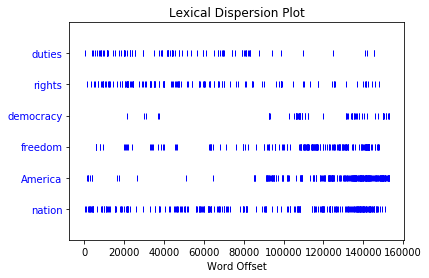

In [29]:
text4.dispersion_plot(["duties", "rights", "democracy", "freedom", "America", "nation"]) # ejecutar en la terminal

En este caso estamos pidiendo la gráfica de dispersión de estas seis palabras en el Inaugural Address Corpus, que es el conjunto de discursos pronunciados por los presidentes de Estados Unidos al acceder al cargo. Están dispuestos uno tras otro siguiendo un orden cronológico, por lo que resulta ideal para pintar este tipo de gráficas y ver cuál ha sido, de forma muy básica, la evolución de una palabra en el tiempo en el lenguaje político y social de Estados Unidos a través de su presencia en estos discursos.

Podemos ver cómo palabras más mundanas como "duties" o "rights" han vivido años mejores, mientras que otras más grandilocuentes como "freedom" o "nation", y más claramente "democracy" o "America" son muy del gusto de los presidentes recientes.

## Diversidad léxica y palabras características
Ya sabemos que con `len()` podemos contar cuántos elementos hay en una estructura de datos. Pues bien, también podemos usarlo con los objetos Text para contar cuántas palabras contiene el texto:

In [13]:
len(text1)

260819

Otra función que también hemos visto ya es `set()`, que nos devuelve un conjunto de la lista que le pasemos, es decir, una estructura de datos en la que los elementos no se repiten. Si le pasamos como argumento un objeto Text, nos devolverá el solo las palabras **únicas** que contiene ese texto:

In [14]:
len(set(text1))

19317

Esto es interesante porque nos permite medir la [diversidad léxica](https://en.wikipedia.org/wiki/Lexical_diversity) del texto que queramos:

In [15]:
def lexical_diversity(text):
    return len(set(text)) * 100 / len(text)

print("Diversidad léxica:")
print("Moby Dick:", lexical_diversity(text1))
print("Sentido y sensibilidad:", lexical_diversity(text2))
print("El hombre que fue jueves:", lexical_diversity(text9))

Diversidad léxica:
Moby Dick: 7.406285585022563
Sentido y sensibilidad: 4.826383002768831
El hombre que fue jueves: 9.834857613454119


También podemos contar las veces que aparece una determinada palabra en un texto con el método `.count()`:

In [16]:
text1.count("whale")

906

Esto nos permite, al combinarlo con `len()`, calcular la presencia relativa de la palabra en cada texto para poder comparar entre distintos textos (no sería justo comparar las apariciones en bruto de la palabra porque los textos tienen diferente largo).

En el siguiente ejemplo, vemos cómo una palabra un tanto marcada por el argumento de la historia, como es "woman" en este caso, difiere mucho en su frecuencia relativa (0,99 en Emma y 0,05 en Moby Dick). Pero sería injustamente mayor si no tuviéramos en cuenta la extensión de cada novela, ya que Moby Dick tiene más del doble de palabras que Emma.

Sin embargo, una palabra más independiente del argumento como es "a", el artículo indeterminado, experimenta poca variación cuando la observamos en distintas novelas (29,89 frente a 23,65).

In [17]:
def mensaje_frecuencia(text, titulo, string):
    print(titulo, "tiene", len(text), "palabras, de las cuales solo", len(set(text)),
        "son únicas.\nLa palabra", string, "aparece", text.count(string),
        "veces, lo que hace que tenga una frecuencia\nrelativa de",
        text.count(string) * 100 / len(set(text)), "en este texto.")

mensaje_frecuencia(text2, "Emma", "woman")
mensaje_frecuencia(text1, "Moby Dick", "woman")

print()

mensaje_frecuencia(text2, "Emma", "a")
mensaje_frecuencia(text1, "Moby Dick", "a")

Emma tiene 141576 palabras, de las cuales solo 6833 son únicas.
La palabra woman aparece 68 veces, lo que hace que tenga una frecuencia
relativa de 0.995170496121762 en este texto.
Moby Dick tiene 260819 palabras, de las cuales solo 19317 son únicas.
La palabra woman aparece 10 veces, lo que hace que tenga una frecuencia
relativa de 0.05176787285810426 en este texto.

Emma tiene 141576 palabras, de las cuales solo 6833 son únicas.
La palabra a aparece 2043 veces, lo que hace que tenga una frecuencia
relativa de 29.899019464364116 en este texto.
Moby Dick tiene 260819 palabras, de las cuales solo 19317 son únicas.
La palabra a aparece 4569 veces, lo que hace que tenga una frecuencia
relativa de 23.652741108867836 en este texto.


## Distribuciones de frecuencia
Pero también podemos extraer directamente las palabras más frecuentes de un texto automáticamente, es decir, las palabras con más apariciones. Y es que existe otro tipo de objeto, FreqDist, que representa una _distribución de frecuencia_, es decir, una lista de pares de valores (o tuplas) en los que un valor se corresponde con una palabra del texto y el otro con su número de apariciones en un texto dado.

In [31]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


En este caso vemos que _Moby Dick_ tiene 260819 pero solo 19317 palabras únicas. Podemos comprobarlo:

In [19]:
print("Palabras totales:", len(text1))
print("Palabras únicas:", len(set(text1)))

Palabras totales: 260819
Palabras únicas: 19317


Pues bien, uno de los métodos que se le pueden aplicar a las FreqDists es `.most_common()`, que devuelve las palabras con más apariciones. Podemos pasarle como parámetro el número de palabras que queremos que nos devuelva, para que no nos saque las 19317:

In [20]:
fdist1.most_common(40)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767)]

Cómo no, también podemos pintarla. Es tan sencillo como usar `.plot()` y pasarle el número de palabras que queremos en la gráfica:

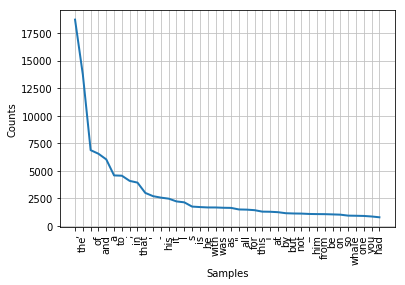

In [21]:
fdist1 = FreqDist(text1)
fdist1.plot(40) # ejecutar en la terminal para que sea dinámica

Esto está muy bien, pero es aún más interesante pintar la gráfica de valores acumulados. Es decir, hacer que para "," salga su número de apariciones, pero que para la siguiente palabra, "the", salga la suma de sus apariciones y las de ",", y para la siguiente, la suma de sus apariciones y las de "," y "the", y así sucesivamente. Para ello simplemente configuramos el valor del parámetro opcional `cumulative` como `True`:

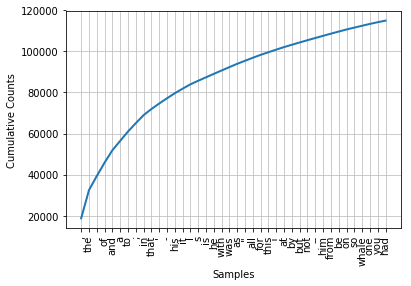

In [22]:
fdist1.plot(40, cumulative=True) # ejecutar en la terminal para que sea dinámica

Ahora podemos fijarnos en el valor de la palabra número 40 en la gráfica (casi 120 000) y darnos cuenta de que, solo con estas 40 palabras, ¡tenemos casi la mitad de las palabras del libro! (¿Recuerdas que el número total era de 260 819?). Cómo te quedas.

Igual que podemos ver las palabras más frecuentes, también podemos consultar las que aparecen solo una vez (o _hápax_), que a veces nos interesan. De hecho, existe una función específica para ello:

In [23]:
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


### Bigramas y colocaciones
En lingüística llamamos _colocación_ a las secuencias de palabras que tienden a aparecer juntas más que otras. Pero ¡ojo! porque acabamos de ver que hay palabras que son tan frecuentes que constituyen fácilmente la mitad de las palabras de un texto. Por tanto, van a coaparecer con muchas otras palabras, simplemente porque son muy frecuentes. Es decir, "vino tinto" es un buen ejemplo de colocación, pero "el vino", no. Una característica de las colocaciones es que no aceptan sustituciones por sinónimos; decimos "vino tinto", pero no "vino rojo".

La operación básica para encontrar colocaciones es buscar _bigramas_, que es como llamamos a todos los pares de palabras que aparecen en un texto. Esto lo podemos hacer con la función `bigrams()`, a la que tenemos que pasarle una lista de palabras, y nos devuelve un objeto secuencial que tendremos que convertir en lista para poder verlo:

In [24]:
list(bigrams(['más', 'vale', 'pájaro', 'en', 'mano', 'que', 'ciento', 'volando']))

[('más', 'vale'),
 ('vale', 'pájaro'),
 ('pájaro', 'en'),
 ('en', 'mano'),
 ('mano', 'que'),
 ('que', 'ciento'),
 ('ciento', 'volando')]

Las colocaciones son, básicamente, bigramas muy frecuentes. De los bigramas que acabamos de generar, probablemente podamos encontrar en otros textos el de "más vale" o el de "en mano" que todos los demás. Y es que para encontrar colocaciones tenemos que prestar atención a los bigramas que contienen palabras menos frecuentes. En concreto, vamos a querer encontrar bigramas que aparezcan más frecuentemente de lo que esperaríamos basándonos solamente en las frecuencias de las palabras que los componen por sí solas. Es un cálculo complicado, pero la función `collocations()` lo hace por nosotros:

In [25]:
text1.collocations()
print()
text2.collocations()
print()
text4.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning

United States; fellow citizens; years ago; four years; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


¡Esto ya nos dice bastante más sobre el contenido de los textos!
## Carga tu propio texto
Todo esto está muy bien, estarás pensando, pero yo no quiero analizar _Moby Dick_, quiero explorar mis propios textos. ¡Obvio!

Podemos cargar cualquier texto mientras lo tengamos en formato de texto plano. El sitio ideal para buscar es el Proyecto Gutenberg. Por ejemplo, podemos buscar El Quijote, que lo tienen en [esta ficha](https://www.gutenberg.org/ebooks/2000) en varios formatos; el que nos interesa es el Plain Text UTF-8. Podemos hacer click con el botón derecho y darle a `Descargar enlace como...`, o pinchar en el enlace y copiar y pegar ese texto en un fichero en nuestro ordenador, que el resultado va a ser el mismo.

Ahora, tenemos que importar del módulo corpus la función PlaintextCorpusReader, que toma como parámetros la ruta de la carpeta donde se encuentra el archivo y una regex con la que intentará hacer match en cada uno de los archivos de esa carpeta. Es decir, que para cargar nuestro corpus no hace falta que esté todo el texto en un mismo archivo, sino que estén todos los archivos en la misma carpeta y sepamos escribir una regex que capture solo los archivos que nos interesan. Si son todos, podemos poner `".*.txt"` (o la extensión que sea); si no, deberemos seguir un patrón en el nombre de los archivos y escribir una regex que capture solo los archivos que nos interesan.

Pero nada de esto nos importa en este caso, porque solo tenemos un archivo, y se encuentra en la misma carpeta que el cuaderno. Así que dejamos la ruta vacía y en el patrón escribimos el nombre de nuestro archivo.

Después hay que aplicarle el método `.words()` y ya podremos convertirlo en un objeto Text:

In [26]:
import nltk
from nltk.corpus import PlaintextCorpusReader

ruta = ""
archivos = "quijote.txt"

mi_corpus = PlaintextCorpusReader(ruta, archivos)
mi_corpus = nltk.Text(mi_corpus.words())

¡Ya está! Ahora podemos aplicar todo lo aprendido a nuestro texto:

In [27]:
mi_corpus.concordance("molinos")

Displaying 12 of 12 matches:
 Lápice ; otros dicen que la de los molinos de viento ; pero , lo que yo he pod
e y jamás imaginada aventura de los molinos de viento , con otros sucesos digno
o , descubrieron treinta o cuarenta molinos de viento que hay en aquel campo ; 
í se parecen no son gigantes , sino molinos de viento , y lo que en ellos parec
éndole que , sin duda alguna , eran molinos de viento , y no gigantes , aquello
ien lo que hacía , que no eran sino molinos de viento , y no lo podía ignorar s
 libros ha vuelto estos gigantes en molinos por quitarme la gloria de su vencim
 poderío . - Peor será esto que los molinos de viento - dijo Sancho -. Mire , s
ba y cogía pasaba por mi mano ; los molinos de aceite , los lagares de vino , e
nos se atienen a la aventura de los molinos de viento , que a vuestra merced le
como se pareció cuando dijo que los molinos de viento eran gigantes , y las mul
sido tortas y pan pintado la de los molinos de viento y la temerosa de los bata


¿A alguien le sorprende que casi todas las apariciones de «molinos» vayan acompañadas de «de viento»?

## Ejercicios
### 100201
Explora las funciones y gráficas que hemos aprendido en este cuaderno con el texto del Quijote y con tus propios textos.
### 100202
¿Sabrías decir qué hace el siguiente código?

In [28]:
sum(len(w) for w in text1)

999044

¿Se te ocurre cómo puedes usarlo para calcular la longitud media de las palabras de un texto?
### 100203
En las 40 palabras más comunes de _Moby Dick_ que hemos visto al generar su distribución de frecuencia, hemos visto que casi todo son stopwords. 

Como ya hicimos en el cuaderno 1001, tiene sentido tomar la lista de palabras más frecuentes de un texto y cruzarla con una lista de stopwords en el idioma de ese texto, para limpiarla y quedarnos solo con las palabras que nos den más pistas sobre el tema o género de ese texto. Y de esto va precisamente este ejercicio:
    
1) descarga la lista de stopwords de inglés del repositorio [Stopwords ISO de Github](https://github.com/stopwords-iso);

2) genera la distribución de frecuencias de _Sentido y sensibilidad_;

3) recorre sus 50 palabras más frecuentes con `for`;

4) comprueba si la palabra está en la lista de stopwords de inglés;

5) comprueba también si la palabra está en la siguiente lista de signos de puntuación;
    
    punctuation = [
        ',', 
        '.', 
        ';', 
        "'", 
        '-', 
        '"', 
        '!', 
        '--',
        '?'
    ]

6) si no está en ninguna de las dos listas, añádela a una lista `topic_words` e imprímela.

A la vista de los resultados, ¿qué podemos decir de la lista de stopwords que nos hemos descargado? ¿Es buena o habría que editarla?